In [1]:
#libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Assignment7_SVM/Mechanical_datasets/Fault_steel_plates/faults.csv')
df.describe()
#type(df)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


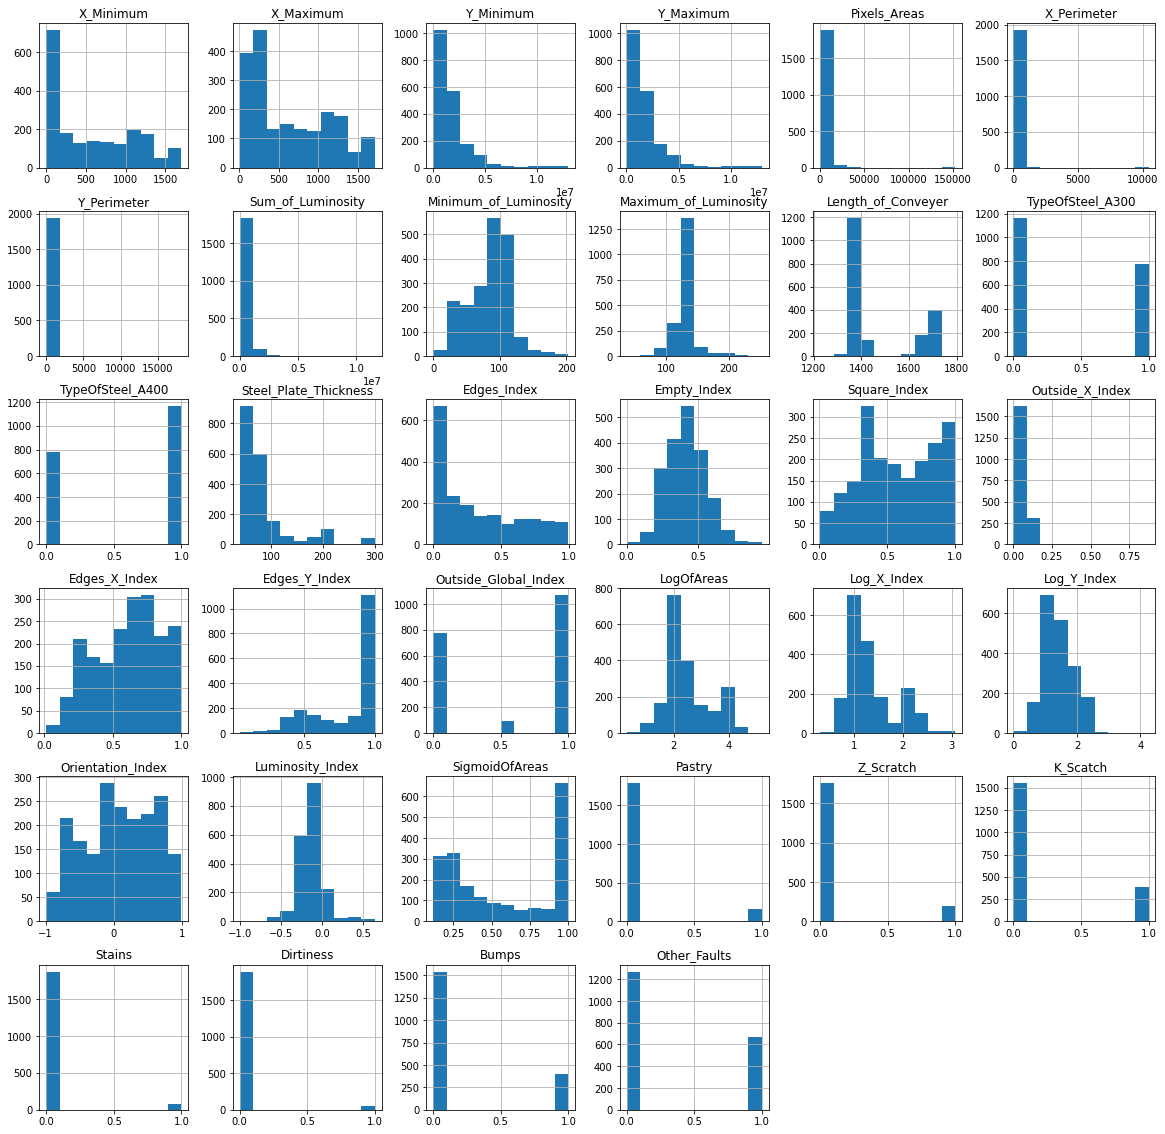

In [9]:
df.hist(figsize=(20,20))
plt.show()

In [42]:
X1 = df.values
type(X1)
#X1

array([[4.200000e+01, 5.000000e+01, 2.709000e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [6.450000e+02, 6.510000e+02, 2.538079e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.290000e+02, 8.350000e+02, 1.553913e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.450000e+02, 1.740000e+02, 3.867790e+05, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.370000e+02, 1.700000e+02, 4.224970e+05, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.261000e+03, 1.281000e+03, 8.795100e+04, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [38]:
features = X1[:,0:27]
features

array([[ 4.200000e+01,  5.000000e+01,  2.709000e+05, ...,  8.182000e-01,
        -2.913000e-01,  5.822000e-01],
       [ 6.450000e+02,  6.510000e+02,  2.538079e+06, ...,  7.931000e-01,
        -1.756000e-01,  2.984000e-01],
       [ 8.290000e+02,  8.350000e+02,  1.553913e+06, ...,  6.667000e-01,
        -1.228000e-01,  2.150000e-01],
       ...,
       [ 1.450000e+02,  1.740000e+02,  3.867790e+05, ..., -4.828000e-01,
         5.200000e-03,  7.079000e-01],
       [ 1.370000e+02,  1.700000e+02,  4.224970e+05, ..., -6.060000e-02,
        -1.710000e-02,  9.919000e-01],
       [ 1.261000e+03,  1.281000e+03,  8.795100e+04, ..., -2.000000e-01,
        -1.139000e-01,  5.296000e-01]])

In [12]:
y_output = df[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]]
x_input = pd.DataFrame(features)

In [20]:
y_output

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


In [14]:
y_output["Pastry"].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
y = []
for i in range(y_output.shape[0]):
    if y_output["Pastry"].values[i] == 1:
        y.append(0)
    elif y_output["Z_Scratch"].values[i] == 1:
        y.append(1)
    elif y_output["K_Scatch"].values[i] == 1:
        y.append(2)
    elif y_output["Stains"].values[i] == 1:
        y.append(3)
    elif y_output["Dirtiness"].values[i] == 1:
        y.append(4)
    elif y_output["Bumps"].values[i] == 1:
        y.append(5)
    else:
        y.append(6)
        
y_op_1d=np.array(y)
y_op_1d.shape

(1941,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_input,y_op_1d,train_size=0.3)

In [19]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_train, y_train)

0.5274914089347079

In [72]:
accuracy_score(X_train, y_train)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [45]:
type(iris.target)

numpy.ndarray

In [35]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score(SVC(), x_input,y_op_1d, cv=10)

array([0.33846154, 0.47938144, 0.57731959, 0.51030928, 0.49484536,
       0.38659794, 0.48969072, 0.5       , 0.60309278, 0.4742268 ])

KeyError: "None of [Int64Index([  53,   54,   55,   56,   57,   58,   59,   60,   61,   62,\n            ...\n            1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940],\n           dtype='int64', length=1294)] are in the [columns]"